In [1]:
import joblib             as jlb
import matplotlib.pyplot  as plt
import numpy              as np
import pandas             as pd
import warnings
warnings.filterwarnings('ignore') # tắt những cảnh báo


In [2]:
folder = 'C:\\Users\\JOinme\\Downloads\\Clustering'

# Customer clustering

Read data

In [14]:
data = pd.read_csv(folder + '\\application.csv').drop('Unnamed: 0', axis = 1)

Convert 'cluster_final' from float to int

In [17]:
data['cluster_final'] = data['cluster_final'].astype(int)

Group by cluters

In [19]:
clusters_group = data.groupby('cluster_final')

## Customer segmentation

Segment by gender

<Figure size 1000x600 with 0 Axes>

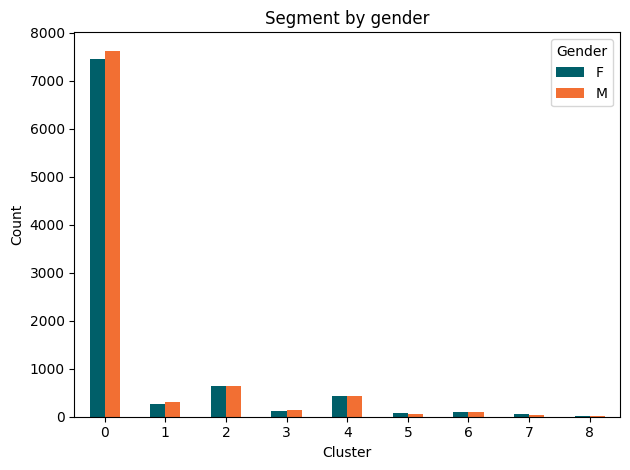

In [28]:
# Count genders in each cluster
gender_counts = clusters_group['Gender'].value_counts().unstack() #value_counts() to count number of samples, unstack to create pivot table

# Create bar chart
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=[(0/255, 95/255, 105/255), (242/255, 111/255, 51/255)])
plt.title('Segment by gender')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation = 0) #Turn the label of x axis to be horizontal
plt.tight_layout()
plt.show()

Choose cluster = 0 to be the target segment

In [29]:
chosen_segment = data[data['cluster_final'] == 0]

Find income range of the segment

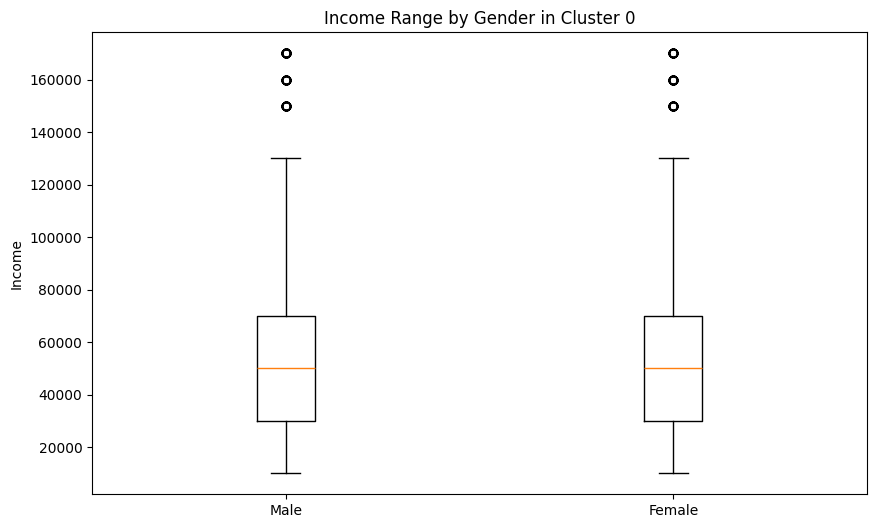

In [40]:
# Create a box plot to compare income range between male and female, reasons why to use box plot is that I also want to see outliers in income between male and female
plt.figure(figsize=(10, 6))
plt.boxplot([
    chosen_segment[chosen_segment['Gender'] == 'M']['YearlyIncome'],
    chosen_segment[chosen_segment['Gender'] == 'F']['YearlyIncome']
], labels=['Male', 'Female'])

plt.title('Income Range by Gender in Cluster 0')
plt.ylabel('Income')
plt.show()

In [43]:
male_IQR = chosen_segment[chosen_segment['Gender'] == 'M']['YearlyIncome'].quantile(0.75) - chosen_segment[chosen_segment['Gender'] == 'M']['YearlyIncome'].quantile(0.25)
female_IQR =  chosen_segment[chosen_segment['Gender'] == 'F']['YearlyIncome'].quantile(0.75) - chosen_segment[chosen_segment['Gender'] == 'F']['YearlyIncome'].quantile(0.25)
print("IQR of male income:", male_IQR)
print("IQR of female income:", female_IQR)

IQR of male income: 40000.0
IQR of female income: 40000.0


Find most frequent level of education in target segment

<Figure size 2000x1200 with 0 Axes>

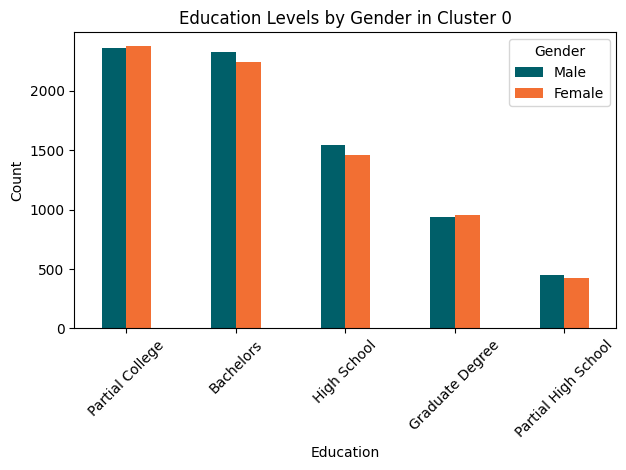

In [92]:
# Get education level counts for the chosen segment and convert to DataFrame
edu_data = pd.DataFrame({
    'Male': chosen_segment[chosen_segment['Gender'] == 'M']['Education'].value_counts(),
    'Female': chosen_segment[chosen_segment['Gender'] == 'F']['Education'].value_counts()
})

# Create grouped bar chart
plt.figure(figsize=(20, 12))
edu_data.plot(kind='bar', 
    color=[(0/255, 95/255, 105/255), (242/255, 111/255, 51/255)],
    width=0.45
)
plt.title('Education Levels by Gender in Cluster 0')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Find most frequent geographical location in target segment

<Figure size 2000x1200 with 0 Axes>

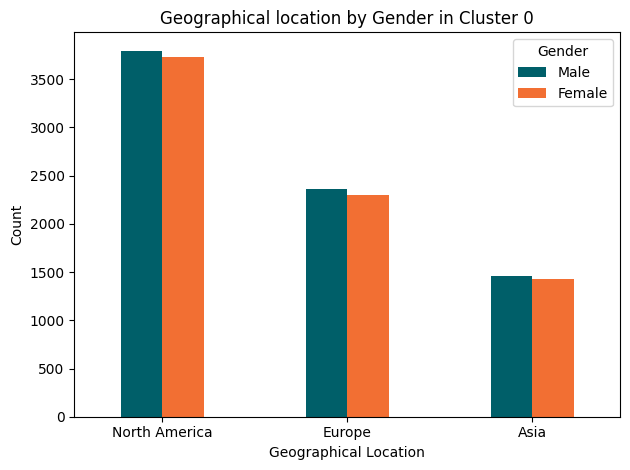

In [91]:
# Get education level counts for the chosen segment and convert to DataFrame
continent_data = pd.DataFrame({
    'Male': chosen_segment[chosen_segment['Gender'] == 'M']['ContinentName'].value_counts(),
    'Female': chosen_segment[chosen_segment['Gender'] == 'F']['ContinentName'].value_counts()
})

# Create grouped bar chart
plt.figure(figsize=(20, 12))
continent_data.plot(kind='bar', 
    color=[(0/255, 95/255, 105/255), (242/255, 111/255, 51/255)],
    width=0.45
)
plt.title('Geographical location by Gender in Cluster 0')
plt.ylabel('Count')
plt.xlabel('Geographical Location')
plt.xticks(rotation=0)  
plt.legend(title='Gender')
plt.tight_layout()
plt.show()